In [67]:
# Barplot our variables by variance by week or month.
# Step 1: Import and set up data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

production = pd.read_pickle("./processed/production_all_dates_and_variables.pkl")
consumption = pd.read_pickle("./processed/consumption_master.pkl")
consumption.reset_index(inplace=True)

numeric_fields = ['FOOD_SERVICE',
                  'GROCERY',
                  'HEALTH_CARE',
                  'K12_SCHOOLS',
                  'LODGING',
                  'OFFICE',
                  'RESIDENTIAL',
                  'STAND_ALONE_RETAIL',
                  'ELECTRIC_CAR']

for field in numeric_fields:
    consumption[field].fillna('0.0', inplace=True)
    consumption[field] = pd.to_numeric(consumption[field])

    
production = production.set_index('Time')
production['Day'] = production.index.day
production['Week'] = production.index.week
consumption = consumption.set_index('Time')
consumption['Day'] = consumption.index.day
consumption['Week'] = consumption.index.week


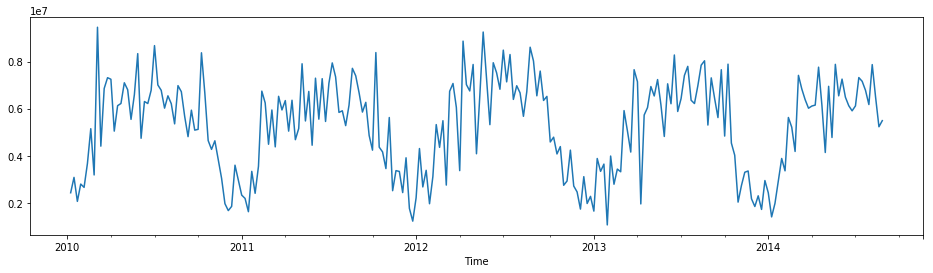

In [68]:
# Step 2: Aggregate Time by week.
chart_dims = (16, 4)
prod_plot = production['Solar_KWH'].resample('w').sum()
prod_plot.plot(figsize=chart_dims, kind='line');
#print(prod_plot.head())
#ax = sns.boxplot(x=prod_plot.index, y='Solar_KWH', data=prod_plot)


In [69]:
print(consumption.head())

                     FOOD_SERVICE   GROCERY  HEALTH_CARE  K12_SCHOOLS  \
Time                                                                    
1900-01-01 01:00:00      0.005416  0.002030     0.002390     0.000818   
1900-01-01 02:00:00      0.003789  0.002032     0.002443     0.000815   
1900-01-01 03:00:00      0.003797  0.001977     0.002413     0.000824   
1900-01-01 04:00:00      0.003802  0.002068     0.002406     0.000817   
1900-01-01 05:00:00      0.003861  0.002176     0.002428     0.000825   

                      LODGING    OFFICE  RESIDENTIAL  STAND_ALONE_RETAIL  \
Time                                                                       
1900-01-01 01:00:00  0.001209  0.001911     0.000541            0.000491   
1900-01-01 02:00:00  0.001215  0.001664     0.000523            0.000499   
1900-01-01 03:00:00  0.001149  0.002005     0.000517            0.000505   
1900-01-01 04:00:00  0.001164  0.001697     0.000514            0.000507   
1900-01-01 05:00:00  0.001211  0

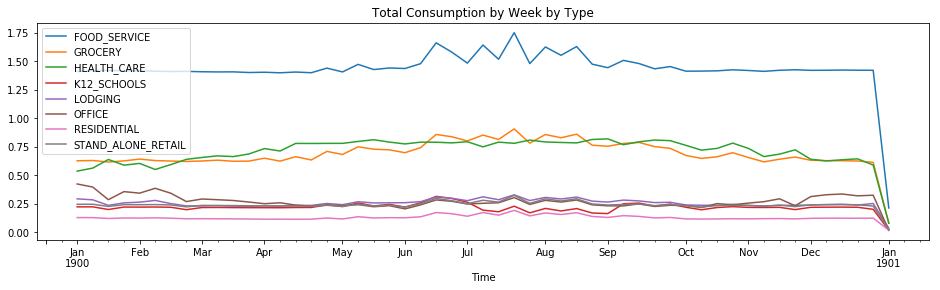

In [82]:
chart_dims = (16, 4)
common_numeric_fields=['FOOD_SERVICE', 'GROCERY', 'HEALTH_CARE',
                       'K12_SCHOOLS', 'LODGING', 'OFFICE',
                       'RESIDENTIAL', 'STAND_ALONE_RETAIL']
all_plot = consumption[common_numeric_fields].resample('w').sum()
fig=all_plot.plot(figsize=chart_dims, kind='line', title='Total Consumption by Week by Type').get_figure()
fig.savefig('./Images/Consumption_by_week.png');


    

